# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.161215e+01     6.687337e+00
 * time: 0.004642963409423828
     1     2.791981e+01     4.841776e+00
 * time: 0.022230863571166992
     2     2.185008e+01     6.207345e+00
 * time: 0.04168891906738281
     3     1.587240e+01     5.810416e+00
 * time: 0.06065702438354492
     4     1.164649e+01     2.280603e+00
 * time: 0.07956886291503906
     5     9.635470e+00     9.746947e-01
 * time: 0.09835195541381836
     6     8.959949e+00     1.763700e+00
 * time: 0.11313891410827637
     7     8.626262e+00     9.282747e-01
 * time: 0.12862491607666016
     8     8.409826e+00     8.477931e-01
 * time: 0.1438889503479004
     9     8.280173e+00     7.178135e-01
 * time: 0.15955185890197754
    10     8.157594e+00     7.871065e-01
 * time: 0.22925186157226562
    11     8.037706e+00     4.259586e-01
 * time: 0.24507784843444824
    12     8.024724e+00     8.256190e-01
 * time: 0.2568850517272949
    13     7.973774e+00     7.887396e-01
 * time:

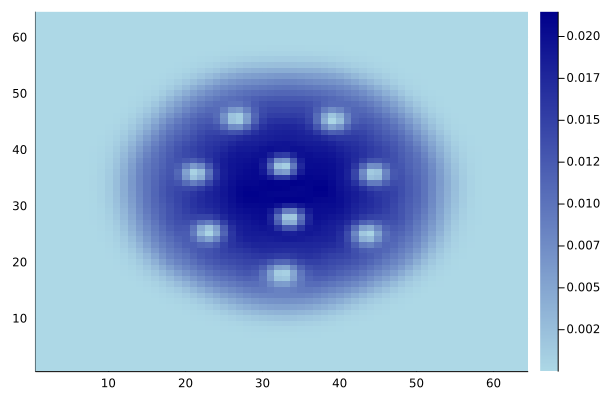

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)